In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_size = 256
batch_size = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size= (image_size,image_size),
    batch_size = batch_size

)

Found 2152 files belonging to 3 classes.


In [3]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

In [5]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 2 1 0 0 0 2 0]


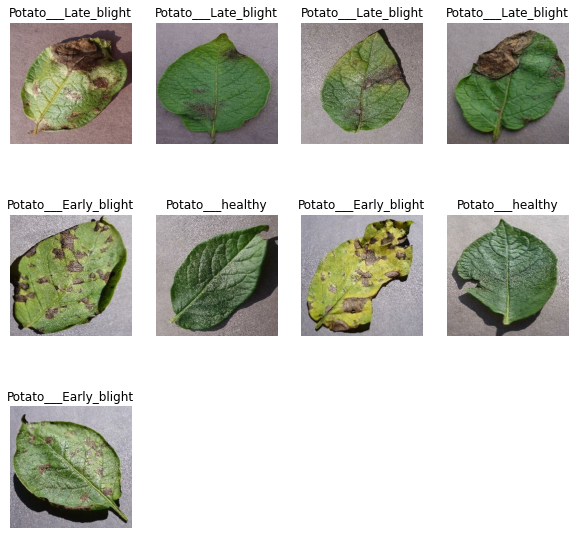

In [6]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

    

In [7]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [9]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [10]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [11]:
validation_dataset = test_dataset.take(6)
len(validation_dataset)

6

In [12]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split *ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (batch_size, image_size,image_size,3)
model = models.Sequential([
    resize_and_scale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax"), 
])

model.build(input_shape= input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer="adam",
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [24]:
history = model.fit(
    train_ds,
    epochs = 49,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/49
54/54 [==============================] - 94s 2s/step - loss: 0.9223 - accuracy: 0.4751 - val_loss: 0.9001 - val_accuracy: 0.5104
Epoch 2/49
54/54 [==============================] - 85s 2s/step - loss: 0.7458 - accuracy: 0.6470 - val_loss: 0.8581 - val_accuracy: 0.6562
Epoch 3/49
54/54 [==============================] - 82s 2s/step - loss: 0.4982 - accuracy: 0.7859 - val_loss: 0.5183 - val_accuracy: 0.7500
Epoch 4/49
54/54 [==============================] - 82s 2s/step - loss: 0.4351 - accuracy: 0.8304 - val_loss: 0.4310 - val_accuracy: 0.8281
Epoch 5/49
54/54 [==============================] - 82s 2s/step - loss: 0.3514 - accuracy: 0.8530 - val_loss: 0.3209 - val_accuracy: 0.8802
Epoch 6/49
54/54 [==============================] - 83s 2s/step - loss: 0.3023 - accuracy: 0.8721 - val_loss: 0.2235 - val_accuracy: 0.9167
Epoch 7/49
54/54 [==============================] - 82s 2s/step - loss: 0.2261 - accuracy: 0.9028 - val_loss: 0.2681 - val_accuracy: 0.9010
Epoch 8/49
54/54 [==

In [25]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 276ms/step - loss: 0.0544 - accuracy: 0.9922


In [26]:
scores

[0.05439964681863785, 0.9921875]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 49, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history["accuracy"]

[0.47511574625968933,
 0.6469907164573669,
 0.7858796119689941,
 0.8304398059844971,
 0.8530092835426331,
 0.8721064925193787,
 0.9027777910232544,
 0.8987268805503845,
 0.9322916865348816,
 0.9346064925193787,
 0.9334490895271301,
 0.9456018805503845,
 0.9322916865348816,
 0.9623842835426331,
 0.9635416865348816,
 0.9554398059844971,
 0.9681712985038757,
 0.9756944179534912,
 0.9629629850387573,
 0.9606481194496155,
 0.9658564925193787,
 0.9733796119689941,
 0.9670138955116272,
 0.9837962985038757,
 0.9797453880310059,
 0.9768518805503845,
 0.9641203880310059,
 0.9716435074806213,
 0.9826388955116272,
 0.9739583134651184,
 0.9803240895271301,
 0.9768518805503845,
 0.9814814925193787,
 0.9849537014961243,
 0.9866898059844971,
 0.9895833134651184,
 0.9866898059844971,
 0.9866898059844971,
 0.9780092835426331,
 0.9774305820465088,
 0.9861111044883728,
 0.9878472089767456,
 0.9832175970077515,
 0.9907407164573669,
 0.9866898059844971,
 0.9907407164573669,
 0.9826388955116272,
 0.986111104

In [31]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

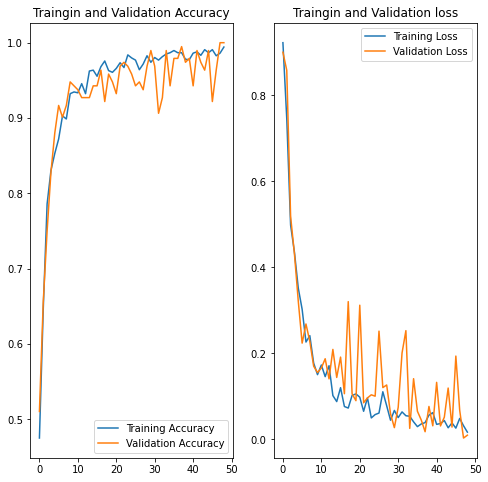

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(49),acc,label="Training Accuracy")
plt.plot(range(49),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Traingin and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(49),loss,label="Training Loss")
plt.plot(range(49),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Traingin and Validation loss")
plt.show()

First image to predict
actual label:  Potato___Late_blight
predicted label:  Potato___Late_blight


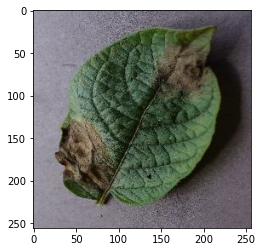

In [49]:
import numpy as np
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

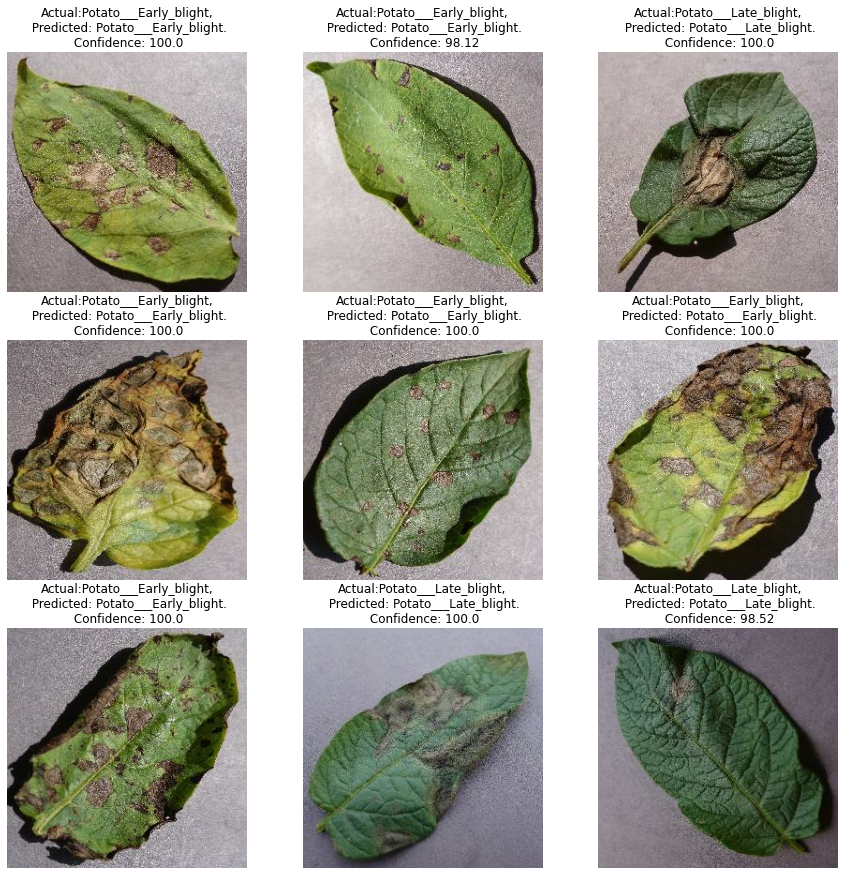

In [61]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}")
        plt.axis("off")

In [75]:
import joblib

In [95]:
model_version = 1
model.save("C:/Users/User/Desktop/project/Models/tanvir.h5")

In [98]:
model_version = 3
model.save(f"../Models/{model_version}.h5")

In [99]:
new_model= keras.models.load_model(f"../Models/{model_version}.h5")